In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import Utils

In [2]:
data = pd.read_csv("../dataset/train.csv")
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [20]:
data['NameLength'] = data['Name'].str.len()-1
# 将cabin拆分为'Deck', 'Num','Side'三个特征
data[['Deck', 'Num','Side']] = data['Cabin'].str.split('/', expand=True)
#将原来特征抛弃
data = data.drop(['Name','Cabin'],axis = 1)
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,NameLength,Deck,Num,Side
0,0001_01,1.0,False,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,14.0,B,0,P
1,0002_01,0.0,False,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,11.0,F,0,S
2,0003_01,1.0,False,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,12.0,A,0,S
3,0003_02,1.0,False,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,11.0,A,0,S
4,0004_01,0.0,False,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,16.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,False,0.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,16.0,A,98,P
8689,9278_01,0.0,True,1.0,18.0,False,0.0,0.0,0.0,0.0,0.0,False,14.0,G,1499,S
8690,9279_01,0.0,False,2.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,11.0,G,1500,S
8691,9280_01,1.0,False,0.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,15.0,E,608,S


In [3]:
data.describe()
assert data['PassengerId'].nunique() == data.shape[0]
assert data.duplicated().sum() == 0

In [4]:
#查看缺失值情况
Utils.missing(data)

,missing_number,missing_percent
CryoSleep,217,0.024963
ShoppingMall,208,0.023927
VIP,203,0.023352
HomePlanet,201,0.023122
Name,200,0.023007
Cabin,199,0.022892
VRDeck,188,0.021627
FoodCourt,183,0.021051
Spa,183,0.021051
Destination,182,0.020936


In [21]:
cate = ['HomePlanet', 'Destination', 'Deck', 'Num', 'Side']#剩余的object特征
data['CryoSleep'] = data['CryoSleep'].astype(bool)
data['VIP'] = data['VIP'].astype(bool)
from sklearn import preprocessing
# 实例化转化器
enc = preprocessing.OrdinalEncoder()
enc.fit(data[cate])
data[cate] = enc.transform(data[cate])
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,NameLength,Deck,Num,Side
0,0001_01,1.0,False,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,14.0,1.0,0.0,0.0
1,0002_01,0.0,False,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,11.0,5.0,0.0,1.0
2,0003_01,1.0,False,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,12.0,0.0,0.0,1.0
3,0003_02,1.0,False,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,11.0,0.0,0.0,1.0
4,0004_01,0.0,False,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,16.0,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,False,0.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,16.0,0.0,1795.0,0.0
8689,9278_01,0.0,True,1.0,18.0,False,0.0,0.0,0.0,0.0,0.0,False,14.0,6.0,548.0,1.0
8690,9279_01,0.0,False,2.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,11.0,6.0,551.0,1.0
8691,9280_01,1.0,False,0.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,15.0,4.0,1385.0,1.0


/var/folders/q8/l063lcwn6936r_rtwxflm4xw0000gn/T/ipykernel_15106/3227541189.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().round(2),annot=True)


<AxesSubplot: >

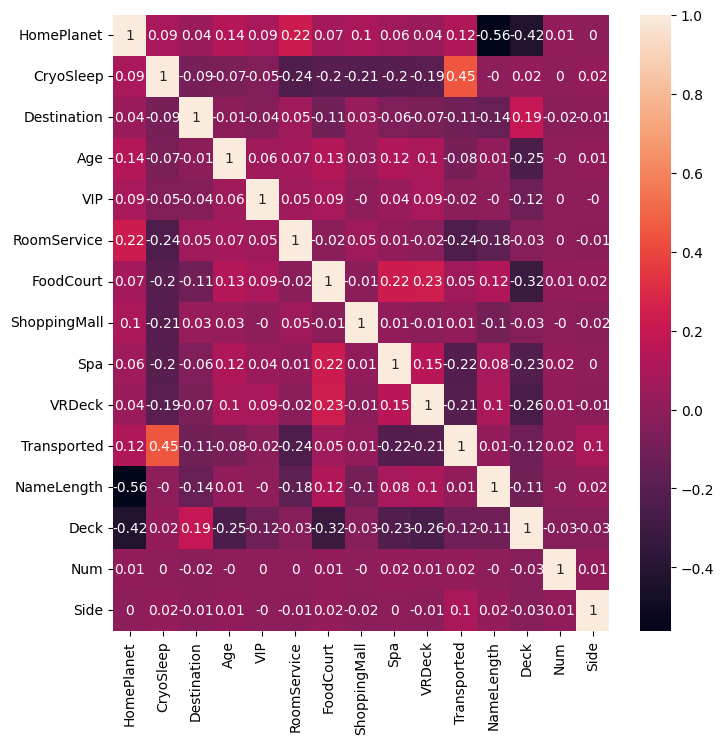

In [22]:
plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr().round(2),annot=True)

In [ ]:
labels=np.array(data[['PassengerId', 'Transported']])
features=data.drop(['PassengerId', 'Transported', 'Name', 'Cabin'], axis=1)